<a href="https://colab.research.google.com/github/sjkim-audio/audio-dsp-lab/blob/main/notebooks/06_Convolution_Reverb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Duration: 14.84 s
Reverb Duration:   17.84 s (Tail included)


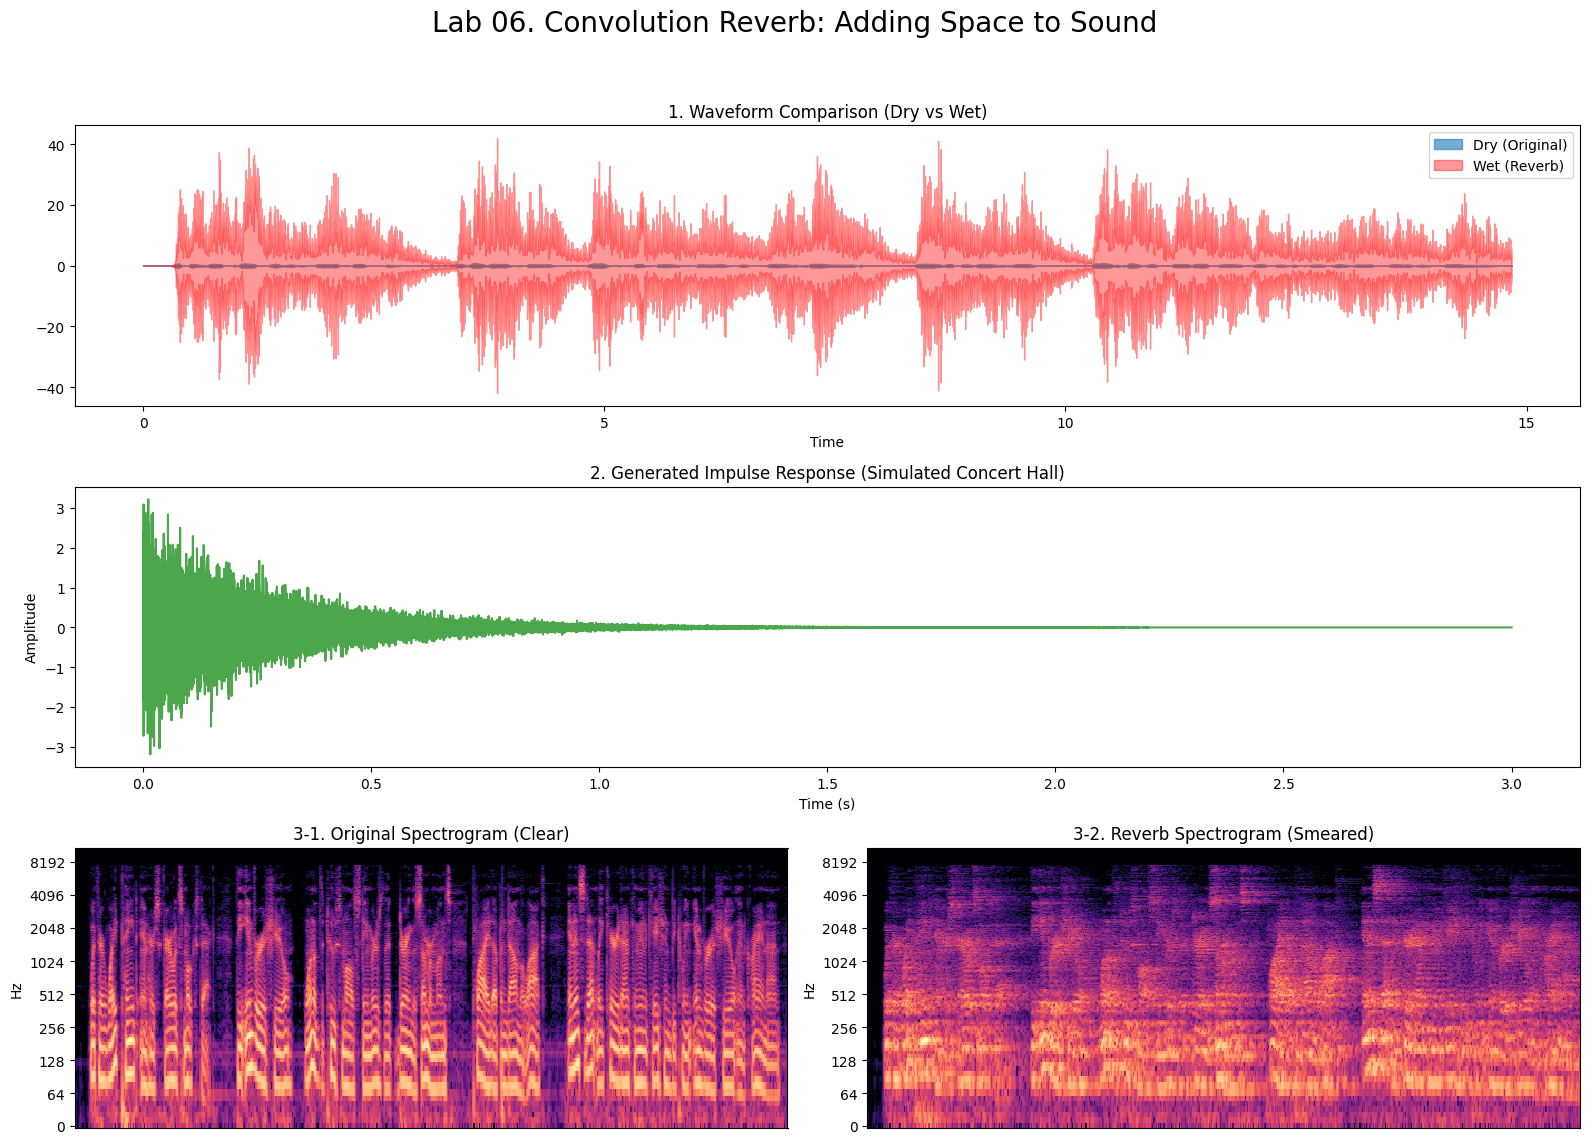

In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import signal

# 1. Dry Signal 로드 (잔향이 없는 원본 목소리)
filename = librosa.ex('libri1')
y, sr = librosa.load(filename)

# 2. Impulse Response (IR) 생성
# IR은 공간의 음향적 특성(지문)을 의미함.
# 실제 공간의 IR 파일을 쓰기도 하지만, 여기서는 가상의 'Concert Hall' 잔향을 생성함.
# 원리: 화이트 노이즈에 지수 함수(Exponential Decay)를 곱해 점점 사라지는 소리를 만듦.

ir_duration = 3.0 # 잔향 길이 3초
ir_length = int(sr * ir_duration)
impulse = np.random.normal(0, 1, ir_length) # 화이트 노이즈 생성
decay = np.exp(-np.linspace(0, 10, ir_length)) # 감쇠 곡선 생성
ir = impulse * decay # 가상의 IR 완성

# 3. Convolution (합성곱) 수행
# 수학적으로 두 신호(목소리 * 공간특성)를 합성하는 연산임.
# mode='full': 목소리가 끝난 뒤 잔향이 남는 부분까지 모두 계산함.
y_wet = signal.convolve(y, ir, mode='full')

# 원본과 길이 맞추기 (시각화 편의상 앞부분만 자름, 실제로는 뒤에 잔향이 남아야 함)
y_wet_visual = y_wet[:len(y)]

print(f"Original Duration: {len(y)/sr:.2f} s")
print(f"Reverb Duration:   {len(y_wet)/sr:.2f} s (Tail included)")

# 4. 결과 시각화
plt.figure(figsize=(16, 12))
plt.suptitle('Lab 06. Convolution Reverb: Adding Space to Sound', fontsize=20)

# [Row 1] 파형 비교
plt.subplot(3, 1, 1)
librosa.display.waveshow(y, sr=sr, alpha=0.6, label='Dry (Original)')
librosa.display.waveshow(y_wet_visual, sr=sr, color='r', alpha=0.4, label='Wet (Reverb)')
plt.title('1. Waveform Comparison (Dry vs Wet)')
plt.legend()

# [Row 2] Impulse Response 확인
plt.subplot(3, 1, 2)
times = np.linspace(0, ir_duration, ir_length)
plt.plot(times, ir, color='g', alpha=0.7)
plt.title('2. Generated Impulse Response (Simulated Concert Hall)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# [Row 3] 스펙트로그램 비교
plt.subplot(3, 2, 5)
D_dry = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
librosa.display.specshow(D_dry, y_axis='log', sr=sr)
plt.title('3-1. Original Spectrogram (Clear)')

plt.subplot(3, 2, 6)
D_wet = librosa.amplitude_to_db(np.abs(librosa.stft(y_wet_visual)), ref=np.max)
librosa.display.specshow(D_wet, y_axis='log', sr=sr)
plt.title('3-2. Reverb Spectrogram (Smeared)')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()